# Lista de Exercícios 5: Analise de estabilidade em tempo discreto

> Felipe Andrade Garcia Tommaselli- 11800910

> Gianluca Capezzuto Sardinha - 11876900

- Slide Aula 5: https://marofe.github.io/controle-digital/2024/aula5.html



In [3]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


### Questão 1 

Nessa atividade o objetivo é verificar o mapeamento do plano-s para o plano-z. Para isso, considere o plano-s dado por

$$
s = \sigma + j \omega_{n}
$$

Assim, o plano-z é dado por

$$
z = e^{sT}
$$

em que $T > 0$ é o tempo de amostragem. Seguindo a mesma lógica construa o gráfico de pelo menos três retas verticais no SPE do plano-s no plano-z com $T = 1$. 

Observando os gráficos, o que pode-se concluir sobre o comportamento dos polos de frequência maior que $\frac{\pi}{T}$?

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')

import control

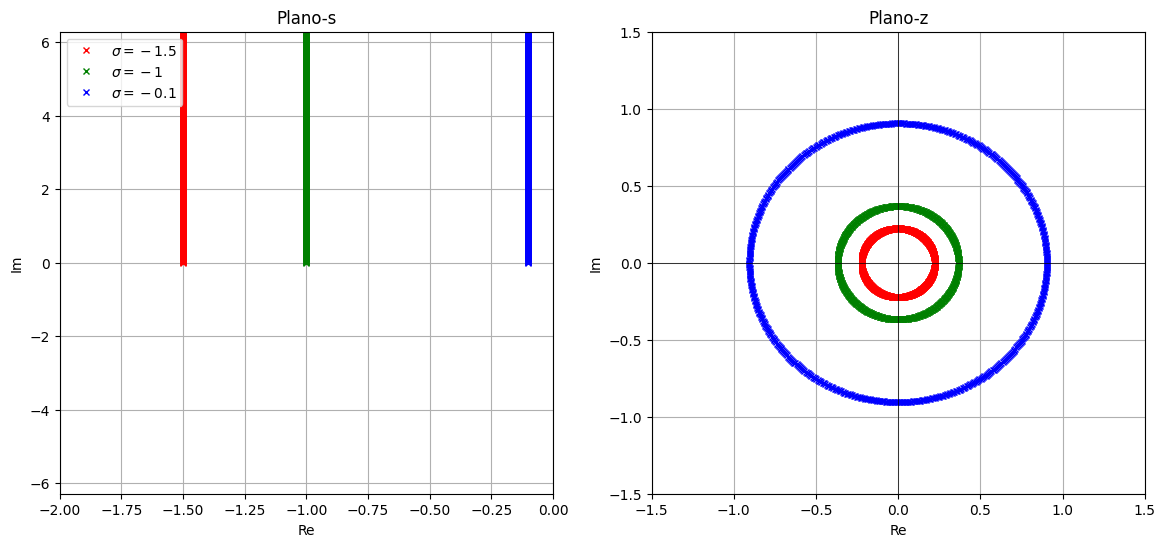

In [5]:
# Sampling time
T = 1

# Sigma values
sigmas = [-1.5, -1.0, -0.1]
colors = ['red', 'green', 'blue']
labels = [r'$\sigma = -1.5$', r'$\sigma = -1$', r'$\sigma = -0.1$']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for idx, sigma in enumerate(sigmas):
    # Frequency values
    wn = np.arange(0, 2*np.pi, 0.01)
    
    # Calculating s and z values
    s = sigma + 1j * wn
    z = np.exp(s * T)
    
    axs[0].plot(np.real(s), np.imag(s), marker='x', linestyle='None',
                color=colors[idx], markersize=4, label=labels[idx])
    
    axs[1].plot(np.real(z), np.imag(z), marker='x', linestyle='None',
                color=colors[idx], markersize=4)

axs[0].set_title('Plano-s')
axs[0].set_xlabel('Re')
axs[0].set_ylabel('Im')
axs[0].set_xlim([-2, 0])
axs[0].set_ylim([-2*np.pi, 2*np.pi])
axs[0].legend()
axs[0].grid(True)

axs[1].set_title('Plano-z')
axs[1].set_xlabel('Re')
axs[1].set_ylabel('Im')
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([-1.5, 1.5])
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].axvline(0, color='black', linewidth=0.5)
axs[1].grid(True)

### Questão 2 

Repita a atividade anterior, porem, ao invés de $z = e^{sT}$, utilize os mapeamentos dos métodos de Euler-Backward ($s = \frac{z − 1}{zT}$) e Tustin ($s = \frac{2}{T}\frac{z - 1}{z + 1}$). 

Quais as principais diferenças que podem ser observadas do mapeamento de EulerBackward e Tustin em relação ao mapeamento $z = e^{sT}$?

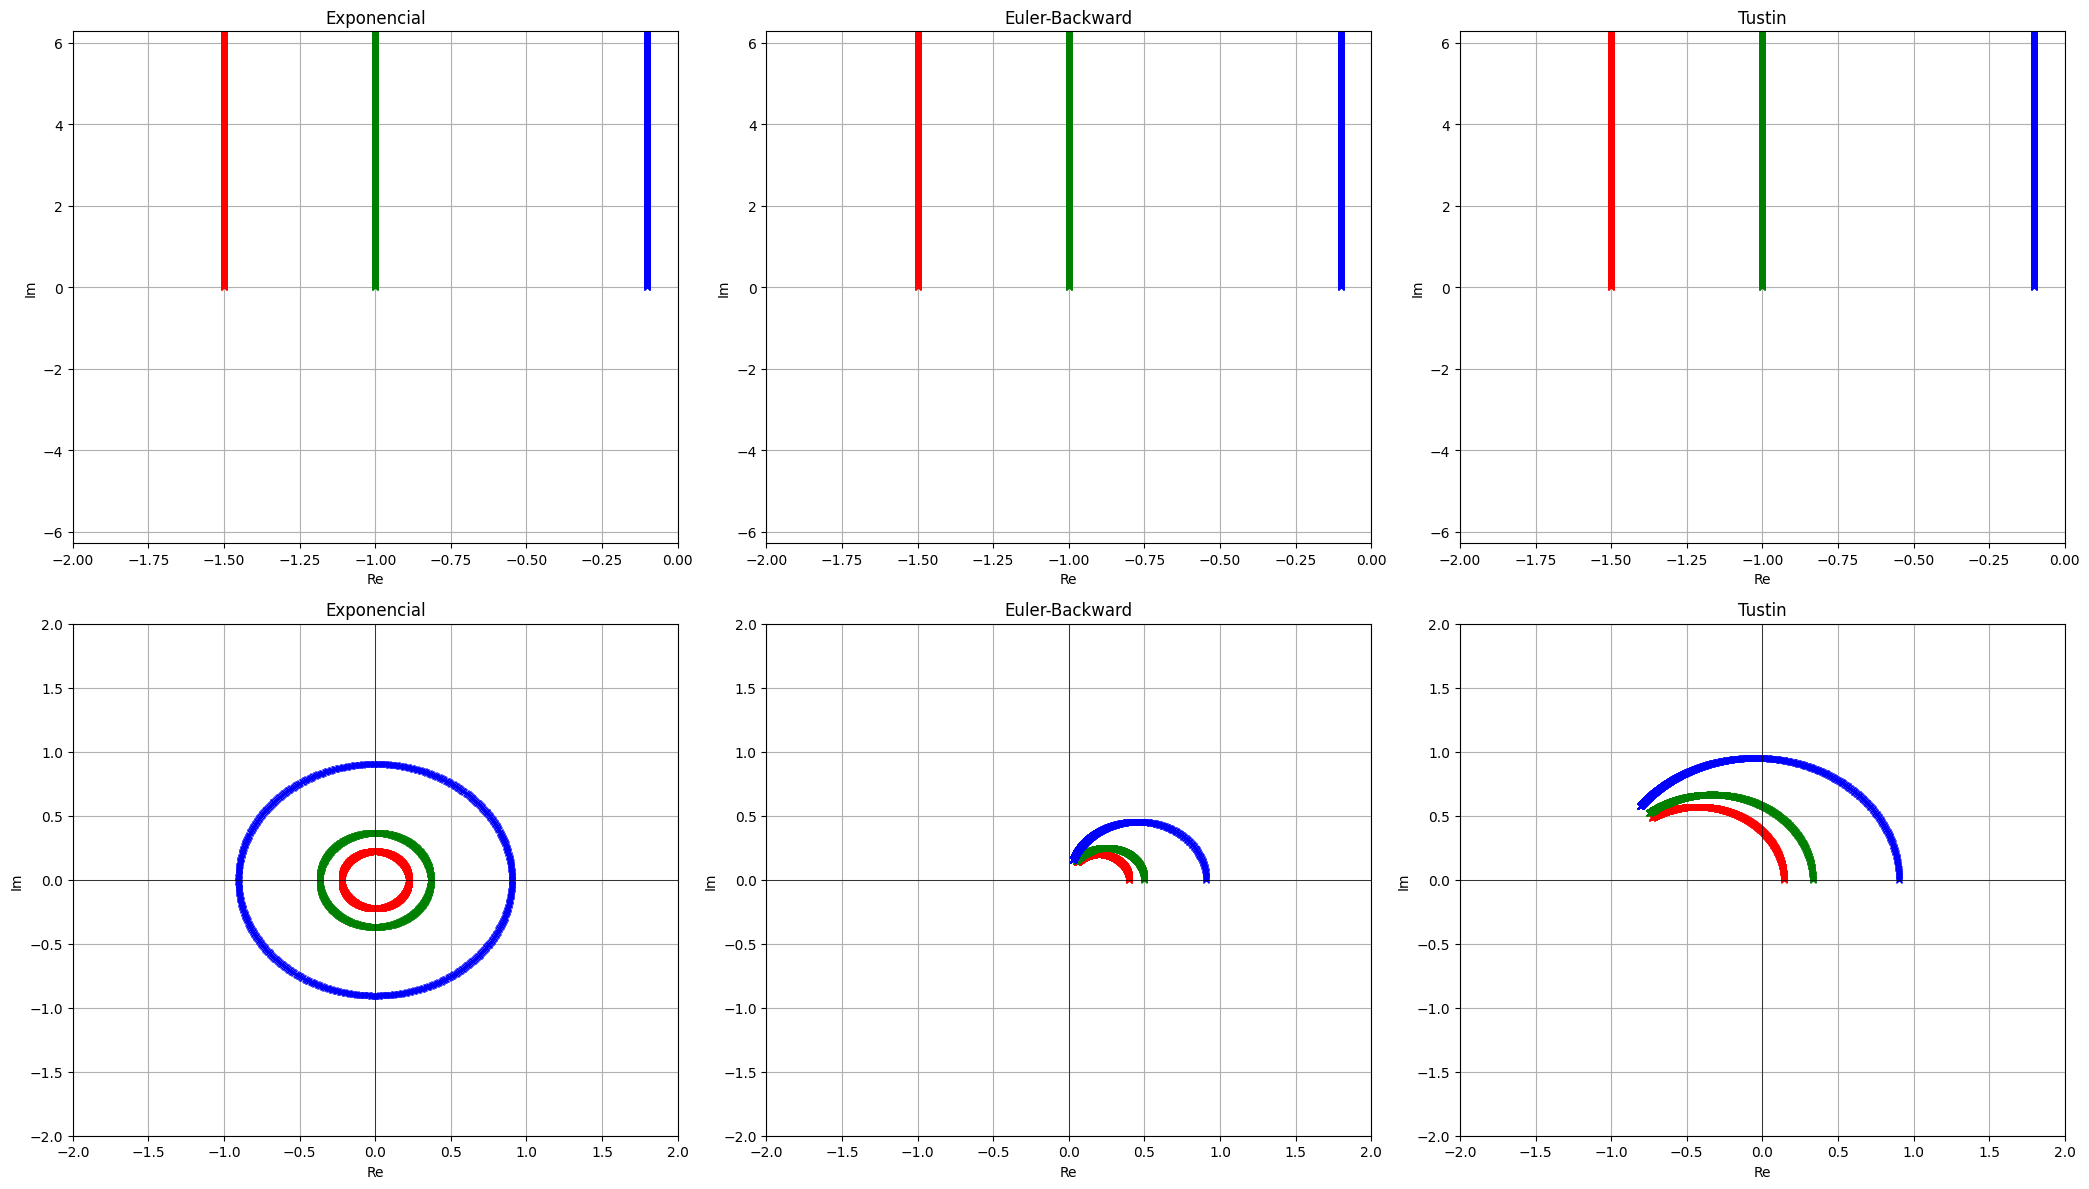

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(21, 12))

# Mapping methods
methods = ['Exponencial', 'Euler-Backward', 'Tustin']
methods_colors = ['red', 'blue', 'orange']

for method_idx, method in enumerate(methods):
    for idx, sigma in enumerate(sigmas):
        # Frequency values
        wn = np.arange(0, 2*np.pi, 0.01)
        
        # Calculating s and z values
        s = sigma + 1j * wn
        
        # Mapeamento de acordo com o método
        if method == 'Exponencial':
            z = np.exp(s * T)
        elif method == 'Euler-Backward':
            z = 1 / (1 - s * T)
        elif method == 'Tustin':
            z = (2/T + s) / (2/T - s)
        else:
            raise ValueError("Método desconhecido.")
        
        axs[0, method_idx].plot(np.real(s), np.imag(s), marker='x', linestyle='None',
                                color=colors[idx], markersize=4, label=labels[idx] if idx ==0 else "")
        
        # Plot no plano-z
        axs[1, method_idx].plot(np.real(z), np.imag(z), marker='x', linestyle='None',
                                color=colors[idx], markersize=4)

    # Configurações dos subplots
    axs[0, method_idx].set_title(methods[method_idx])
    axs[0, method_idx].set_xlabel('Re')
    axs[0, method_idx].set_ylabel('Im')
    axs[0, method_idx].set_xlim([-2, 0])
    axs[0, method_idx].set_ylim([-2*np.pi, 2*np.pi])
    axs[0, method_idx].grid(True)

    axs[1, method_idx].set_title(methods[method_idx])
    axs[1, method_idx].set_xlabel('Re')
    axs[1, method_idx].set_ylabel('Im')
    axs[1, method_idx].set_xlim([-2, 2])
    axs[1, method_idx].set_ylim([-2, 2])
    axs[1, method_idx].axhline(0, color='black', linewidth=0.5)
    axs[1, method_idx].axvline(0, color='black', linewidth=0.5)
    axs[1, method_idx].grid(True)

plt.tight_layout()
plt.show()

### Questão 3 

Nessa atividade, o objetivo é verificar o mapeamento bilinear do círculo unitário para o semi-plano esquerdo do plano-w. Isso é interessante, pois, permite avaliar estabilidade de um sistema em tempo discreto da mesma forma que se faz em tempo contínuo.

Para isso, considere o mapeamento

$$
w = \frac{z + 1}{z - 1}
$$

Dessa forma, círculos de raio menor que 1 no plano-z cobrem o semi-plano esquerdo do plano-w. Verificando o mapeamento no Matlab, o que ocorre com os polos cuja frequência está próxima da frequência de Nyquist no plano-w?

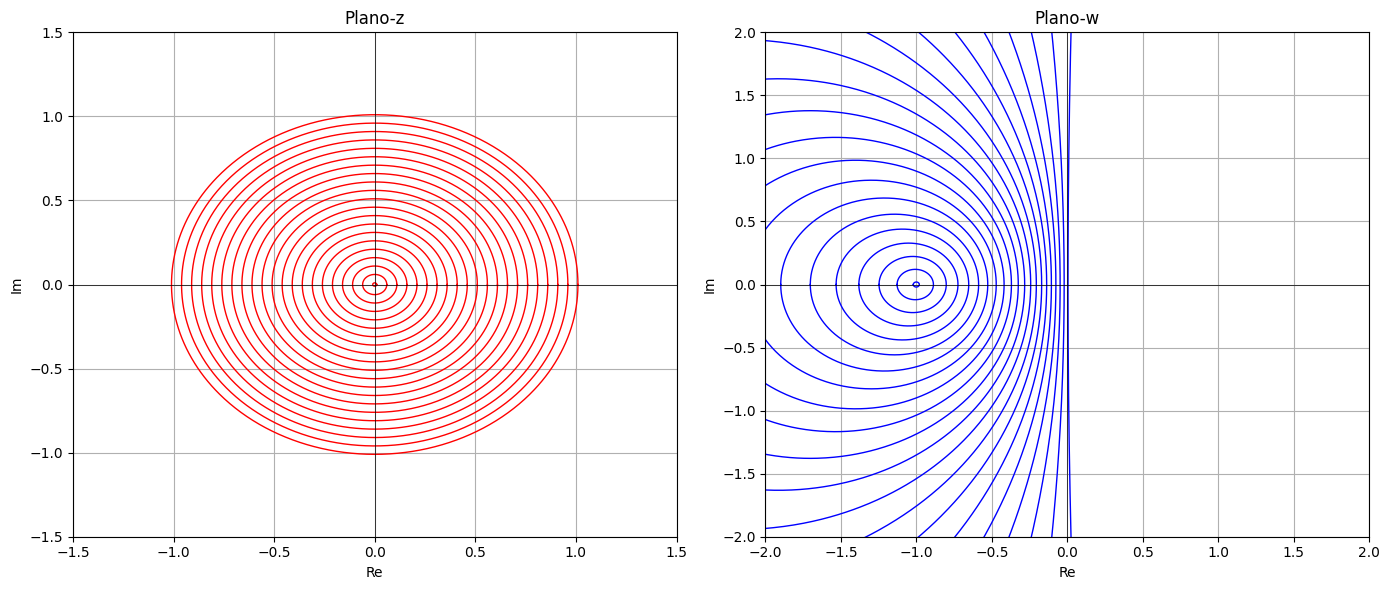

In [7]:
def bilinear_mapping(z):
    return (z + 1) / (z - 1)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Frequency values
theta = np.linspace(0, 2*np.pi, 1000)

for r in np.arange(0.01, 1.05, 0.05):
    # Calculating s and z values
    z = r * np.exp(1j * theta)
    w = bilinear_mapping(z)
    
    axs[0].plot(np.real(z), np.imag(z), 'red', linewidth=1)
    axs[1].plot(np.real(w), np.imag(w), 'blue', linewidth=1)

axs[0].set_title('Plano-z')
axs[0].set_xlabel('Re')
axs[0].set_ylabel('Im')
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([-1.5, 1.5])
axs[0].grid(True)
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].axvline(0, color='black', linewidth=0.5)

axs[1].set_title('Plano-w')
axs[1].set_xlabel('Re')
axs[1].set_ylabel('Im')
axs[1].set_xlim([-2, 2])
axs[1].set_ylim([-2, 2])
axs[1].grid(True)
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

# 4 Atividade 4
Nessa atividade, o objetivo é visualizar o ganho crítico de uma malha de controle digital.  
Para isso, considere o seguinte exemplo com \( T = 0.1s \):

$$
G(z) = \frac{0.06027z^2 + 0.01096z - 0.04932}{z^2 - 2.164z + 1.219}
$$

O código a seguir obtém o Lugar Geométrico das Raízes da equação característica do sistema de controle digital ilustrado na Figura 1 em função de um ganho \( K \) através do comando `rlocus`. Além do mais, o ganho crítico \( K_c \) pode ser obtido usando o comando `margin`.

**Figure 1**: Malha de Controle Digital com bloco de controle proporcional.  
**k -> G(z)**

---

1. close all % fecha todas as janelas  
2. clear all % limpa memória  
3. clc % limpa command window  
4. %%  
5. Gd=tf([0.06027 0.01096 -0.04932],[1 -2.164 1.219],0.1);  
6. rlocus(Gd)  
7. zgrid  
8. title('Lugar Geométrico das Raízes')  
9. axis equal  
10. Kc=margin(Gd)  

---

Portanto, para uma malha de controle fechada (com realimentação unitária) para esse sistema \( G(z) \), avaliando o LGR, tem-se:

- Estável se \( K > K_c \);
- Instável se \( K < K_c \);
- Marginalmente estável se \( K = K_c \).

O código em Matlab a seguir apresenta a resposta ao degrau desse sistema para cada situação.

---

1. T=0.1;  
2. t=0:T:20;  
3. K=2.5;  
4. Gf1=K*Gd/(1+K*Gd);  
5. [y1,t]=step(Gf1,t);  
6. figure  
7. stairs(t,y1)  
8. title('K>K_c (Estável)')  
9. K=Kc;  
10. Gf2=K*Gd/(1+K*Gd);  
11. [y2,t]=step(Gf2,t);  
12. figure  
13. stairs(t,y2)  
14. title('K=K_c (Marginalmente estável)')  
15. K=1.5;  
16. Gf3=K*Gd/(1+K*Gd);  
17. [y3,t]=step(Gf3,t);  
18. figure  
19. stairs(t,y3)  
20. title('K<K_c (Instável)')  

---

Seguindo a mesma lógica, encontre o ganho crítico \( K_c \) e obtenha a resposta ao degrau para \( K = K_c \), \( K > K_c \) e \( K < K_c \) das seguintes funções de transferência (FT):

1. \( G(z) = \frac{0.05268z + 0.01052}{z^2 - 1.541z + 0.5408} \)
2. \( G(z) = \frac{0.02268z + 0.02052}{z^2 - 1.741z + 0.7408} \)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import tf, feedback, step, rlocus
from control import margin

In [9]:
# Sampling period
T = 0.1

# Define the transfer function G(z)
num1 = [0.05268, 0.01052]
den1 = [1, -1.541, 0.5408]
Gd1 = tf(num1, den1, T)

# Compute the critical gain Kc analytically
Kc1 = (1 - 0.5408) / 0.01052
print(f"Critical Gain Kc1: {Kc1}")

# Time vector for simulation
t = np.arange(0, 20 + T, T)

# Case 1: K > Kc (Stable)
K1_stable = Kc1 + 5  # K > Kc1
Gf1_stable = feedback(K1_stable * Gd1, 1)
y1_stable, t1_stable = step(Gf1_stable, t)

# Case 2: K = Kc (Marginally Stable)
K1_critical = Kc1
Gf1_critical = feedback(K1_critical * Gd1, 1)
y1_critical, t1_critical = step(Gf1_critical, t)

# Case 3: K < Kc (Unstable)
K1_unstable = Kc1 - 5  # K < Kc1
Gf1_unstable = feedback(K1_unstable * Gd1, 1)
y1_unstable, t1_unstable = step(Gf1_unstable, t)


Critical Gain Kc1: 43.650190114068444


In [10]:
# Define the transfer function G(z)
num2 = [0.02268, 0.02052]
den2 = [1, -1.741, 0.7408]
Gd2 = tf(num2, den2, T)

# Compute the critical gain Kc analytically
Kc2 = (1 - 0.7408) / 0.02052
print(f"Critical Gain Kc2: {Kc2}")

# Case 1: K > Kc (Stable)
K2_stable = Kc2 + 5  # K > Kc2
Gf2_stable = feedback(K2_stable * Gd2, 1)
y2_stable, t2_stable = step(Gf2_stable, t)

# Case 2: K = Kc (Marginally Stable)
K2_critical = Kc2
Gf2_critical = feedback(K2_critical * Gd2, 1)
y2_critical, t2_critical = step(Gf2_critical, t)

# Case 3: K < Kc (Unstable)
K2_unstable = Kc2 - 5  # K < Kc2
Gf2_unstable = feedback(K2_unstable * Gd2, 1)
y2_unstable, t2_unstable = step(Gf2_unstable, t)


Critical Gain Kc2: 12.63157894736842


Text(0, 0.5, 'Amplitude')

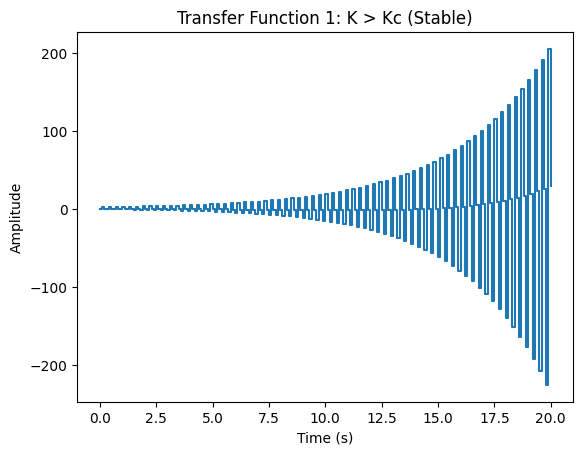

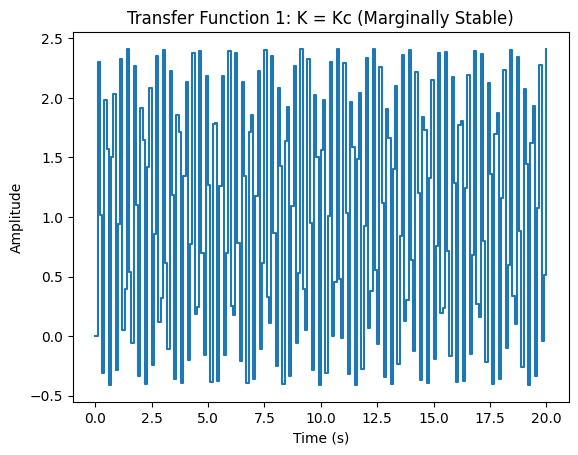

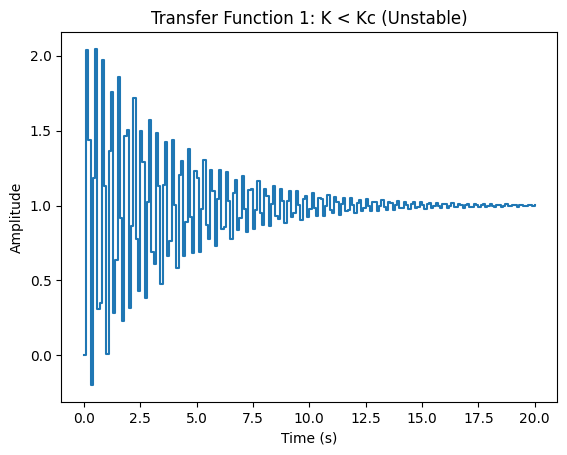

In [11]:
# Plot for K > Kc (Stable)
plt.figure()
plt.step(t1_stable, y1_stable, where='post')
plt.title('Transfer Function 1: K > Kc (Stable)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot for K = Kc (Marginally Stable)
plt.figure()
plt.step(t1_critical, y1_critical, where='post')
plt.title('Transfer Function 1: K = Kc (Marginally Stable)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot for K < Kc (Unstable)
plt.figure()
plt.step(t1_unstable, y1_unstable, where='post')
plt.title('Transfer Function 1: K < Kc (Unstable)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


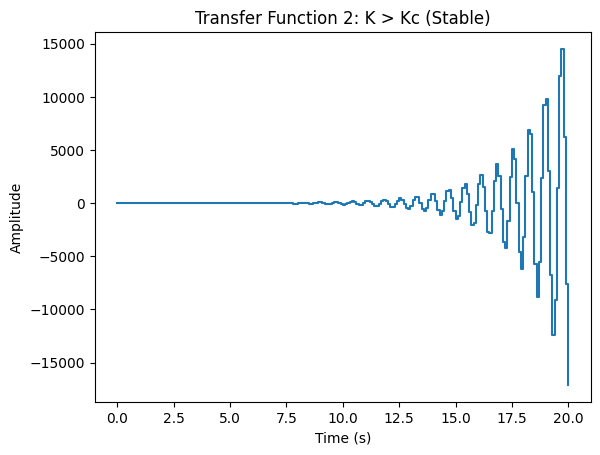

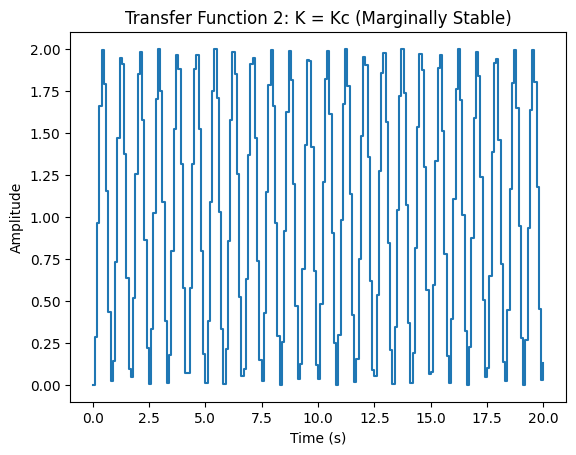

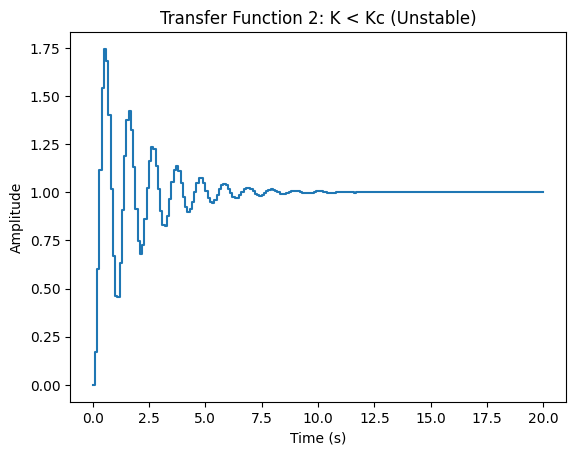

In [12]:
# Plot for K > Kc (Stable)
plt.figure()
plt.step(t2_stable, y2_stable, where='post')
plt.title('Transfer Function 2: K > Kc (Stable)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot for K = Kc (Marginally Stable)
plt.figure()
plt.step(t2_critical, y2_critical, where='post')
plt.title('Transfer Function 2: K = Kc (Marginally Stable)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot for K < Kc (Unstable)
plt.figure()
plt.step(t2_unstable, y2_unstable, where='post')
plt.title('Transfer Function 2: K < Kc (Unstable)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Show all plots
plt.show()


# 5 Atividade 5
Nessa atividade, o objetivo é usar o Matlab para avaliar a sensibilidade da estabilidade de um sistema em tempo discreto em função da variação de um parâmetro do modelo.  
Para isso, considere a seguinte equação a diferenças:

$$
y[k] = -0.5y[k - 1] + (0.1 + \alpha)u[k];
$$

em que \( \alpha \) é uma variação paramétrica do sistema (devido a alguma perturbação no sistema).  
Portanto, a função de transferência para esse caso é dada por:

$$
G(z) = \frac{(0.1 + \alpha)z}{z + 0.5}
$$

Esse sistema é estável em malha fechada para qualquer valor de perturbação \( \alpha \in [0, 1] \)?

Para responder essa pergunta, pode-se implementar uma estrutura de repetição `for` no Matlab conforme a seguir:

---

1. close all  
2. clear all  
3. clc  
4. %%  
5. for alpha=0:0.1:1  
6. G=tf([0.1+alpha 0],[1 0.5],-1);  
7. Gf=G/(1+G);  
8. figure(1)  
9. hold on  
10. p=pole(Gf);  
11. if sum(abs(p)>1)≥1  
12. disp(['instável para alpha=' num2str(alpha)])  
13. end  
14. plot(real(p),imag(p),'x','LineWidth',2,'Color','red')  
15. zgrid  
16. end  

---

Verifica-se assim que o sistema em malha fechada é estável para todo \( \alpha \in [0, 1] \).

Seguindo a mesma lógica, verifique se o sistema descrito pela seguinte equação a diferenças é estável para todo \( \alpha \in [0, 1] \):

$$
y[k] - 0.7y[k - 1] - 0.81y[k - 2] + (0.67 + \alpha)y[k - 3] - 0.12y[k - 4] = x[k]
$$

Se for instável, para qual valor de \( \alpha \) o sistema fica marginalmente estável?


In [18]:
# Import necessary libraries
import numpy as np
from control.matlab import tf, feedback, pole

# Initialize arrays to store poles and alpha values
poles_list = []
alpha_values = np.arange(0, 1.01, 0.1)  # Alpha from 0 to 1 in steps of 0.1

# Loop over alpha values
for alpha in alpha_values:
    # Define the numerator and denominator of G(z)
    # Numerator: z^4 coefficients
    num = [1, 0, 0, 0, 0]  # Coefficients for z^4 to z^0

    # Denominator: z^4 - 0.7*z^3 - 0.81*z^2 + (0.67 + alpha)*z - 0.12
    den = [1, -0.7, -0.81, 0.67 + alpha, -0.12]

    # Define the open-loop transfer function G(z) with a sample time T=1
    G = tf(num, den, 1)

    # Compute the closed-loop transfer function Gf(z)
    Gf = feedback(G, 1)

    # Compute the poles of Gf(z)
    p = pole(Gf)

    # Store the poles and alpha values for plotting
    poles_list.append(p)

    # Check if any poles are outside the unit circle (unstable)
    unstable = False
    for pole_value in p:
        if abs(pole_value) > 1:
            unstable = True
            break

    # Print stability information
    if unstable:
        print(f"System is **unstable** for alpha = {alpha}")
    else:
        print(f"System is stable for alpha = {alpha}")


System is stable for alpha = 0.0
System is stable for alpha = 0.1
System is stable for alpha = 0.2
System is stable for alpha = 0.30000000000000004
System is stable for alpha = 0.4
System is stable for alpha = 0.5
System is stable for alpha = 0.6000000000000001
System is stable for alpha = 0.7000000000000001
System is stable for alpha = 0.8
System is stable for alpha = 0.9
System is stable for alpha = 1.0


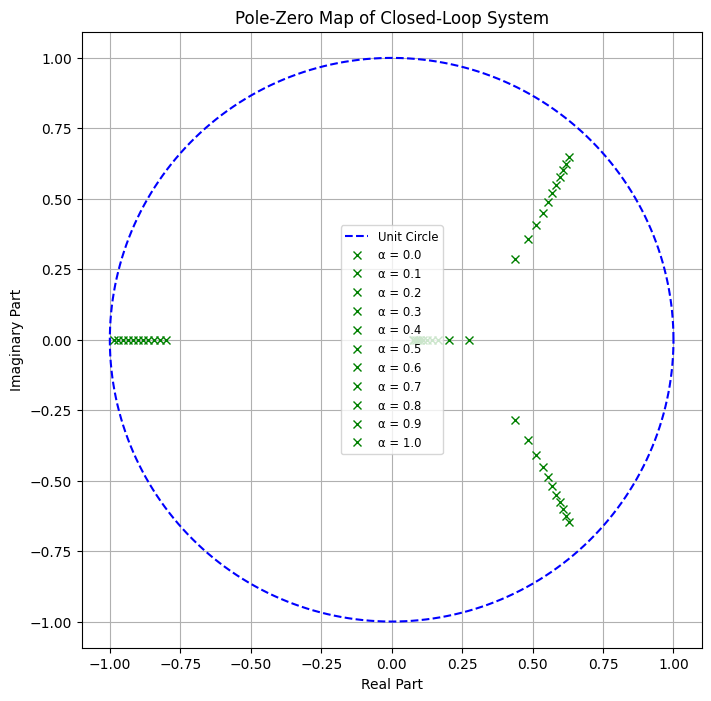

In [19]:
# Import plotting library
import matplotlib.pyplot as plt

# Create a new figure for the pole-zero plot
plt.figure(figsize=(8, 8))
plt.title('Pole-Zero Map of Closed-Loop System')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)

# Plot the unit circle for reference
theta = np.linspace(0, 2 * np.pi, 500)
plt.plot(np.cos(theta), np.sin(theta), 'b--', label='Unit Circle')

# Plot the poles for each alpha value
for idx, alpha in enumerate(alpha_values):
    p = poles_list[idx]
    # Use a different color for unstable cases
    if any(abs(pole_value) > 1 for pole_value in p):
        color = 'red'
    else:
        color = 'green'
    # Plot poles
    plt.plot(p.real, p.imag, 'x', color=color, label=f'α = {alpha:.1f}')

# Set aspect ratio to equal for proper circle display
plt.axis('equal')

# Show legend (may get crowded; adjust as needed)
plt.legend(loc='best', fontsize='small')

# Display the plot
plt.show()


### Questão 6

De forma simplificada, uma aeronave com piloto automático no módulo longitudinal obedece a seguinte função de transferência: 

$$
G(s) = \frac{(s + 1)}{s(s − 1)(s2 + 4s + 16)}
$$

1. Obtenha o lugar geométrico das raízes desse sistema em tempo contínuo.

2. Obtenha a faixa de ganho para os quais o sistema é estável.
 
3. Faça a discretização da FT com $T = 0.5$ usando método degrau-invariante e obtenha o lugar geométrico das raízes do sistema discretizado.

4. Repita o item anterior usando metodo de discretização de Tustin.

5. Apresente um comparativo da resposta ao degrau desse sistema em tempo contínuo com as versões discretizadas usando método degrau-invariante e Tustin para um ganho estável. O que pode-se concluir em relação ao transitório do sistema discretizado?

/home/tommaselli/.local/lib/python3.10/site-packages/control/rlocus.py:132: FutureWarning: 'Plot' keyword is deprecated in root_locus; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in root_locus; "


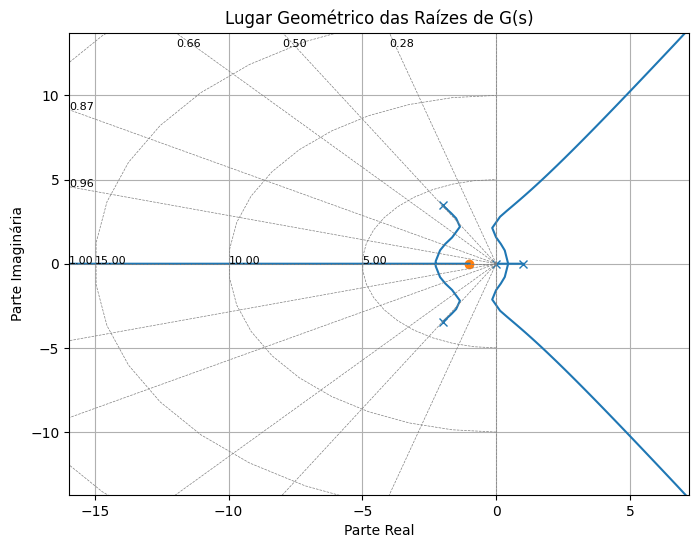

In [13]:
# Defining the transfer function
num = [1, 1]
den = [1, 3, 12, -16, 0]

G = control.TransferFunction(num, den)

plt.figure(figsize=(8,6))
control.root_locus(G, Plot=True)
plt.title('Lugar Geométrico das Raízes de G(s)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid(True)
plt.show()

In [14]:
# Values for K
K_values = np.linspace(0, 100, 1000)

rlist, klist = control.root_locus(G, kvect=K_values, Plot=False)

def is_stable(poles):
    return np.all(np.real(poles) < 0)

# Identify stable K values
stable_K = []
for idx, poles in enumerate(rlist):
    if is_stable(poles):
        stable_K.append(klist[idx])

if stable_K:
    K_min = min(stable_K)
    K_max = max(stable_K)
    print(f'Faixa de ganho K para estabilidade: {K_min:.2f} <= K <= {K_max:.2f}')
else:
    print('Nenhum ganho K mantém o sistema estável.')

Faixa de ganho K para estabilidade: 23.32 <= K <= 35.64



Função de Transferência Discretizada (Degrau-Invariante):

0.01509 z^3 + 0.03196 z^2 - 0.0165 z - 0.005148
-----------------------------------------------
z^4 - 2.531 z^3 + 1.471 z^2 - 0.1637 z + 0.2231

dt = 0.5



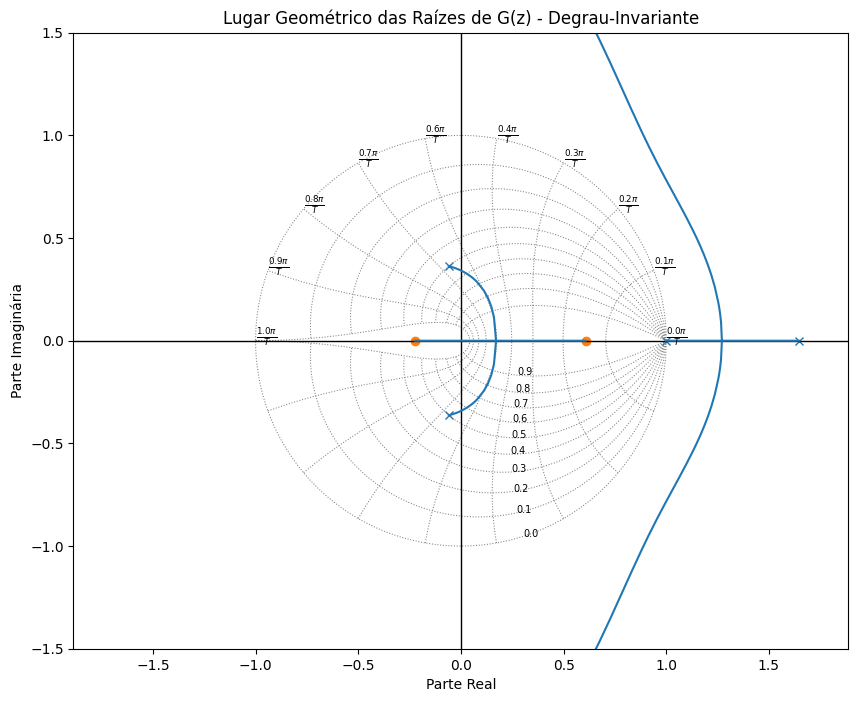

In [15]:
T = 0.5

try:
    Gd_step = control.c2d(G, T, method='zoh')
    print('\nFunção de Transferência Discretizada (Degrau-Invariante):')
    print(Gd_step)

    plt.figure(figsize=(10, 8))
    control.root_locus(Gd_step, Plot=True, grid=True)
    plt.title('Lugar Geométrico das Raízes de G(z) - Degrau-Invariante')
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.show()
except Exception as e:
    print('\nErro ao discretizar usando o método Degrau-Invariante:', e)
    print('Provavelmente devido a polos instáveis no sistema contínuo.')


Função de Transferência Discretizada (Tustin):

0.008681 z^4 + 0.02083 z^3 + 0.01042 z^2 - 0.006944 z - 0.005208
----------------------------------------------------------------
          z^4 - 2.667 z^3 + 2 z^2 - 0.8889 z + 0.5556

dt = 0.5



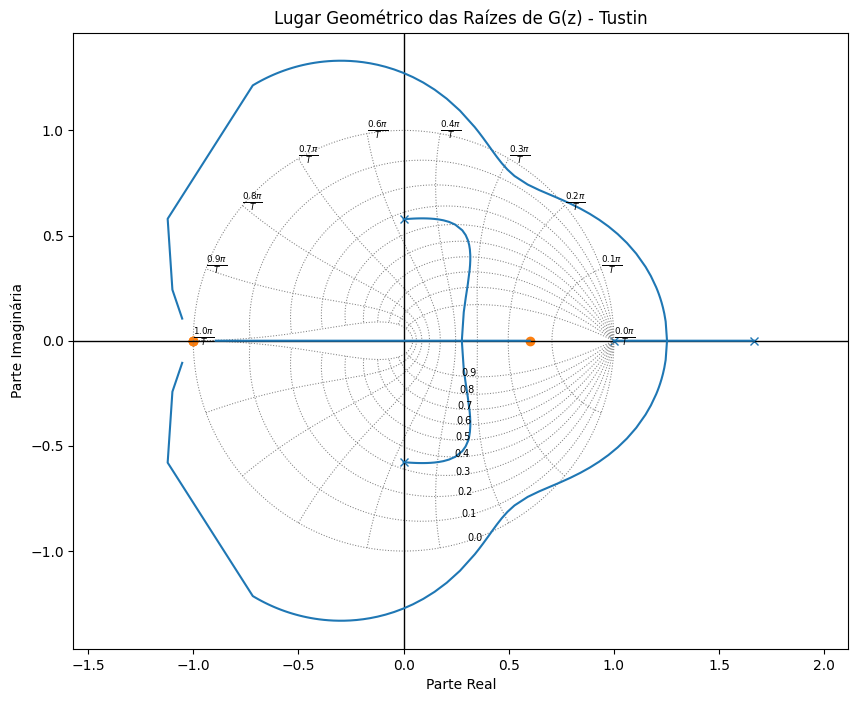

In [16]:
Gd_tustin = control.c2d(G, T, method='tustin')

try:
    print('\nFunção de Transferência Discretizada (Tustin):')
    print(Gd_tustin)

    plt.figure(figsize=(10, 8))
    control.root_locus(Gd_tustin, Plot=True, grid=True)
    plt.title('Lugar Geométrico das Raízes de G(z) - Tustin')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.show()
except Exception as e:
    print('\nErro ao discretizar usando o método Tustin:', e)
    print('Provavelmente devido a polos instáveis no sistema contínuo.')


Usando K = 29.48 dentro da faixa estável (23.32 <= K <= 35.64).


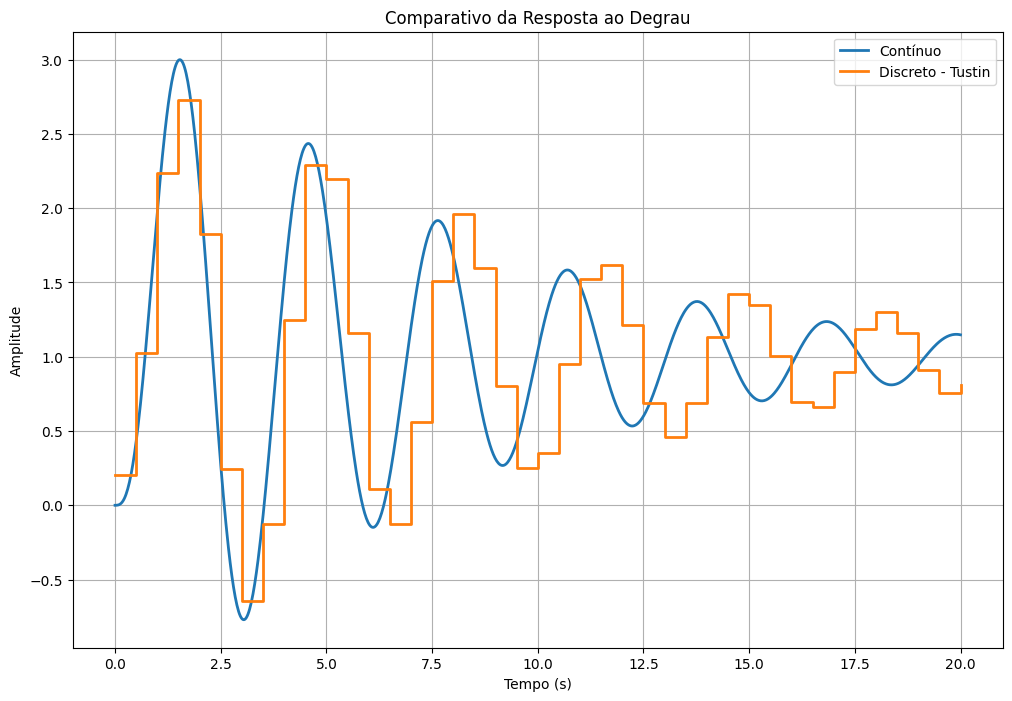

In [17]:
# Get a K value within the stable range
if 'K_min' in locals() and 'K_max' in locals() and len(stable_K) > 0:
    K = (K_min + K_max) / 2
    print(f'\nUsando K = {K:.2f} dentro da faixa estável ({K_min:.2f} <= K <= {K_max:.2f}).')
else:
    print('\nNenhuma faixa de ganho K estável encontrada. Selecionando K = 0.1 como exemplo.')
    K = 0.1 

# Transfer function with feedback
Gmf_continuo = control.feedback(K*G, 1)
Gmf_tustin = control.feedback(K*Gd_tustin, 1)

# Time for the step response
t_continuo = np.linspace(0, 20, 1000)  
t_discreto = np.arange(0, 20 + T, T)   

# Step response for the continuous system
T_continuo, y_continuo = control.step_response(Gmf_continuo, t_continuo)

# Step response for the discrete system
T_discrete_tustin, y_tustin = control.step_response(Gmf_tustin, t_discreto)

plt.figure(figsize=(12, 8))
plt.plot(T_continuo, y_continuo, label='Contínuo', linewidth=2)
plt.step(T_discrete_tustin, y_tustin, where='post', label='Discreto - Tustin', linewidth=2)
plt.title('Comparativo da Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()